# Generate pretty plots for Individual GLAM models

In [1]:
import glam
import pandas as pd
import numpy as np
import os.path

import matplotlib.pyplot as plt

In [2]:
import pymc3 as pm

In [3]:
np.random.seed(23) # from random.org

# Like NUTS 31

In [33]:
# Load data

sufix = '_individual_Like_NoBin_Gamma-11_NUTS_31'
data = pd.read_csv('data/FF2018_data/GlamDataFF2018_Like_NoBin_31.csv')

# Subset only necessary columns
data = data[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]
data.head()

,subject,trial,choice,rt,item_value_0,item_value_1,gaze_0,gaze_1
0,0,0,0,2009,1.10,0.95,0.568396,0.431604
1,0,1,0,3371,2.00,1.70,0.762332,0.237668
2,0,2,1,1700,1.10,2.30,0.446809,0.553191
3,0,3,1,7466,1.25,1.40,0.532352,0.467648
4,0,4,1,1889,2.00,2.30,0.529736,0.470264


## Split data in training and test sets

In [34]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for subject in data.subject.unique():
    subject_data = data[data['subject'] == subject].copy().reset_index(drop=True)
    n_trials = len(subject_data)
    
    subject_train = subject_data.iloc[np.arange(0, n_trials, 2)].copy()
    subject_test = subject_data.iloc[np.arange(1, n_trials, 2)].copy()

    test_data = pd.concat([test_data, subject_test])
    train_data = pd.concat([train_data, subject_train])

#test_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_test'+sufix+'.csv'))
#train_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_train'+sufix+'.csv'))

print('Split data into training ({} trials) and test ({} trials) sets...'.format(len(train_data), len(test_data)))

Split data into training (1860 trials) and test (1860 trials) sets...


# Load predictions

## Full Model

In [35]:
glam_full = glam.GLAM(train_data)

In [36]:
# Predictions
print('Predicting test set data using full GLAM...')
glam_full.exchange_data(test_data)

if not os.path.exists(str('results/predictions/glam_FF2019_full'+sufix+'.csv')):
    glam_full.predict(n_repeats=50)
    glam_full.prediction.to_csv(str('results/predictions/glam_FF2019_full'+sufix+'.csv'), index=False)
else:
    print('  Found old hierarchical full GLAM predictions in "results/predictions". Skipping prediction...')
    glam_full.prediction = pd.read_csv(str('results/predictions/glam_FF2019_full'+sufix+'.csv'))

glam_full.prediction.head()

Predicting test set data using full GLAM...
Replaced attached data (1860 trials) with new data (1860 trials)...
  Found old hierarchical full GLAM predictions in "results/predictions". Skipping prediction...


,subject,trial,repeat,choice,rt,item_value_0,gaze_0,item_value_1,gaze_1
0,0.0,0.0,0.0,0.0,2556.0,2.0,0.762332,1.7,0.237668
1,0.0,0.0,1.0,0.0,2682.0,2.0,0.762332,1.7,0.237668
2,0.0,0.0,2.0,0.0,1639.0,2.0,0.762332,1.7,0.237668
3,0.0,0.0,3.0,0.0,1657.0,2.0,0.762332,1.7,0.237668
4,0.0,0.0,4.0,0.0,1860.0,2.0,0.762332,1.7,0.237668


## No-bias

In [8]:
glam_nobias = glam.GLAM(train_data)

In [9]:
# Predictions
print('Predicting test set data using no-bias GLAM...')
glam_nobias.exchange_data(test_data)
 
if not os.path.exists(str('results/predictions/glam_FF2018_nobias_hierarchical_cv'+sufix+'.csv')):
     glam_nobias.predict(n_repeats=50)
     glam_nobias.prediction.to_csv(str('results/predictions/glam_FF2018_nobias_hierarchical_cv'+sufix+'.csv'), index=False)
else:
     print('  Found old hierarchical no-bias GLAM predictions in "results/predictions". Skipping prediction...')
     glam_nobias.prediction = pd.read_csv(str('results/predictions/glam_FF2018_nobias_hierarchical_cv'+sufix+'.csv'))
glam_nobias.prediction.head()

Predicting test set data using no-bias GLAM...
Replaced attached data (1860 trials) with new data (1860 trials)...
  Found old hierarchical no-bias GLAM predictions in "results/predictions". Skipping prediction...


,choice,repeat,rt,subject,trial,item_value_0,gaze_0,item_value_1,gaze_1
0,0.0,0.0,4306.0,0.0,0.0,2.0,0.762332,1.7,0.237668
1,0.0,1.0,1850.0,0.0,0.0,2.0,0.762332,1.7,0.237668
2,0.0,2.0,2673.0,0.0,0.0,2.0,0.762332,1.7,0.237668
3,0.0,3.0,3377.0,0.0,0.0,2.0,0.762332,1.7,0.237668
4,0.0,4.0,3097.0,0.0,0.0,2.0,0.762332,1.7,0.237668


Close Figure to continue...


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'
  seen=seen, canon=canonical, used=seen[-1]))


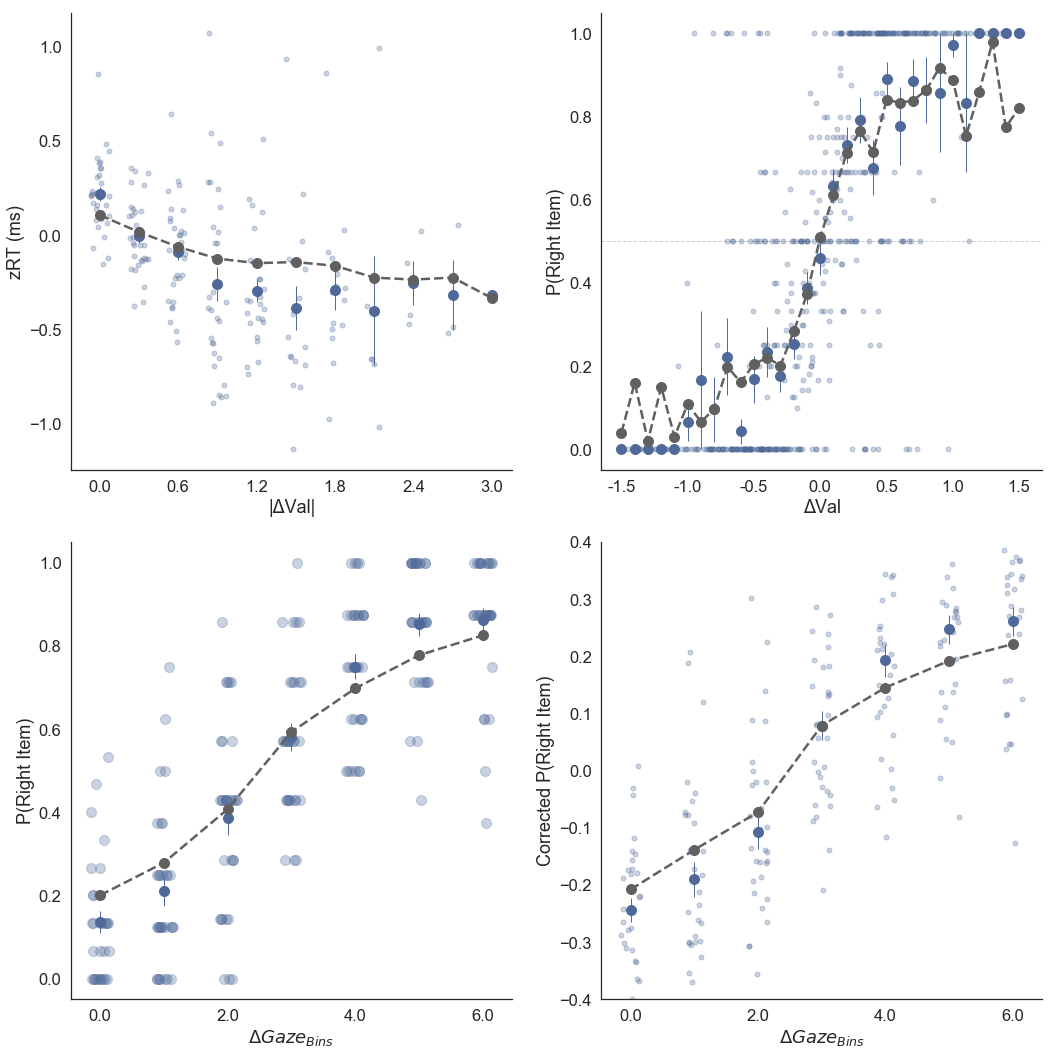

In [37]:
print('Close Figure to continue...')
glam.plot_fit(test_data, [glam_full.prediction], color_data = '#4F6A9A');
#glam.plot_fit(test_dat|a, [glam_full.prediction,glam_nobias.prediction], color_data = '#4F6A9A' );
plt.show()
# Shown dots containing the mean observed for that segment bin for those participants

In [12]:
# Mode to update!!!!

---------------------------------------------------------
# Case No-Bin DisLike NUTS 31

In [16]:
# Load data
sufix = '_individual_Dislike_NoBin_Gamma-11_NUTS_31'
data = pd.read_csv('data/FF2018_data/GlamDataFF2018_Dislike_NoBin_31.csv')
# Subset only necessary columns
data = data[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]
data.head()

,subject,trial,choice,rt,item_value_0,item_value_1,gaze_0,gaze_1
0,0,0,1,3327,0.95,2.00,0.745415,0.254585
1,0,1,1,3424,2.30,1.70,0.410720,0.589280
2,0,2,1,3691,1.70,1.25,0.330549,0.669451
3,0,3,0,8144,1.55,2.30,0.592345,0.407655
4,0,4,0,6559,2.00,2.00,0.641717,0.358283


## Split data in training and test sets

In [17]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for subject in data.subject.unique():
    subject_data = data[data['subject'] == subject].copy().reset_index(drop=True)
    n_trials = len(subject_data)
    
    subject_train = subject_data.iloc[np.arange(0, n_trials, 2)].copy()
    subject_test = subject_data.iloc[np.arange(1, n_trials, 2)].copy()

    test_data = pd.concat([test_data, subject_test])
    train_data = pd.concat([train_data, subject_train])

#test_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_test'+sufix+'.csv'))
#train_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_train'+sufix+'.csv'))

print('Split data into training ({} trials) and test ({} trials) sets...'.format(len(train_data), len(test_data)))

Split data into training (1860 trials) and test (1860 trials) sets...


# Load predictions

## Full Model

In [15]:
glam_full = glam.GLAM(train_data)

In [18]:
# Predictions
print('Predicting test set data using full GLAM...')
glam_full.exchange_data(test_data)

if not os.path.exists(str('results/predictions/glam_FF2019_full'+sufix+'.csv')):
    glam_full.predict(n_repeats=50)
    glam_full.prediction.to_csv(str('results/predictions/glam_FF2019_full'+sufix+'.csv'), index=False)
else:
    print('  Found old hierarchical full GLAM predictions in "results/predictions". Skipping prediction...')
    glam_full.prediction = pd.read_csv(str('results/predictions/glam_FF2019_full'+sufix+'.csv'))

glam_full.prediction.head()

Predicting test set data using full GLAM...
Replaced attached data (1860 trials) with new data (1860 trials)...
  Found old hierarchical full GLAM predictions in "results/predictions". Skipping prediction...


,subject,trial,repeat,choice,rt,item_value_0,gaze_0,item_value_1,gaze_1
0,0.0,0.0,0.0,1.0,2759.0,2.3,0.41072,1.7,0.58928
1,0.0,0.0,1.0,1.0,2689.0,2.3,0.41072,1.7,0.58928
2,0.0,0.0,2.0,0.0,2432.0,2.3,0.41072,1.7,0.58928
3,0.0,0.0,3.0,0.0,2443.0,2.3,0.41072,1.7,0.58928
4,0.0,0.0,4.0,0.0,2555.0,2.3,0.41072,1.7,0.58928


## No-bias

In [17]:
glam_nobias = glam.GLAM(train_data)

In [18]:
# Predictions
print('Predicting test set data using no-bias GLAM...')
glam_nobias.exchange_data(test_data)
 
if not os.path.exists(str('results/predictions/glam_FF2018_nobias_hierarchical_cv'+sufix+'.csv')):
     glam_nobias.predict(n_repeats=50)
     glam_nobias.prediction.to_csv(str('results/predictions/glam_FF2018_nobias_hierarchical_cv'+sufix+'.csv'), index=False)
else:
     print('  Found old hierarchical no-bias GLAM predictions in "results/predictions". Skipping prediction...')
     glam_nobias.prediction = pd.read_csv(str('results/predictions/glam_FF2018_nobias_hierarchical_cv'+sufix+'.csv'))
glam_nobias.prediction.head()

Predicting test set data using no-bias GLAM...
Replaced attached data (1860 trials) with new data (1860 trials)...
  Found old hierarchical no-bias GLAM predictions in "results/predictions". Skipping prediction...


,choice,repeat,rt,subject,trial,item_value_0,gaze_0,item_value_1,gaze_1
0,1.0,0.0,1847.0,0.0,0.0,2.3,0.41072,1.7,0.58928
1,1.0,1.0,3338.0,0.0,0.0,2.3,0.41072,1.7,0.58928
2,1.0,2.0,4180.0,0.0,0.0,2.3,0.41072,1.7,0.58928
3,1.0,3.0,2502.0,0.0,0.0,2.3,0.41072,1.7,0.58928
4,0.0,4.0,3474.0,0.0,0.0,2.3,0.41072,1.7,0.58928


Close Figure to continue...


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'
  seen=seen, canon=canonical, used=seen[-1]))


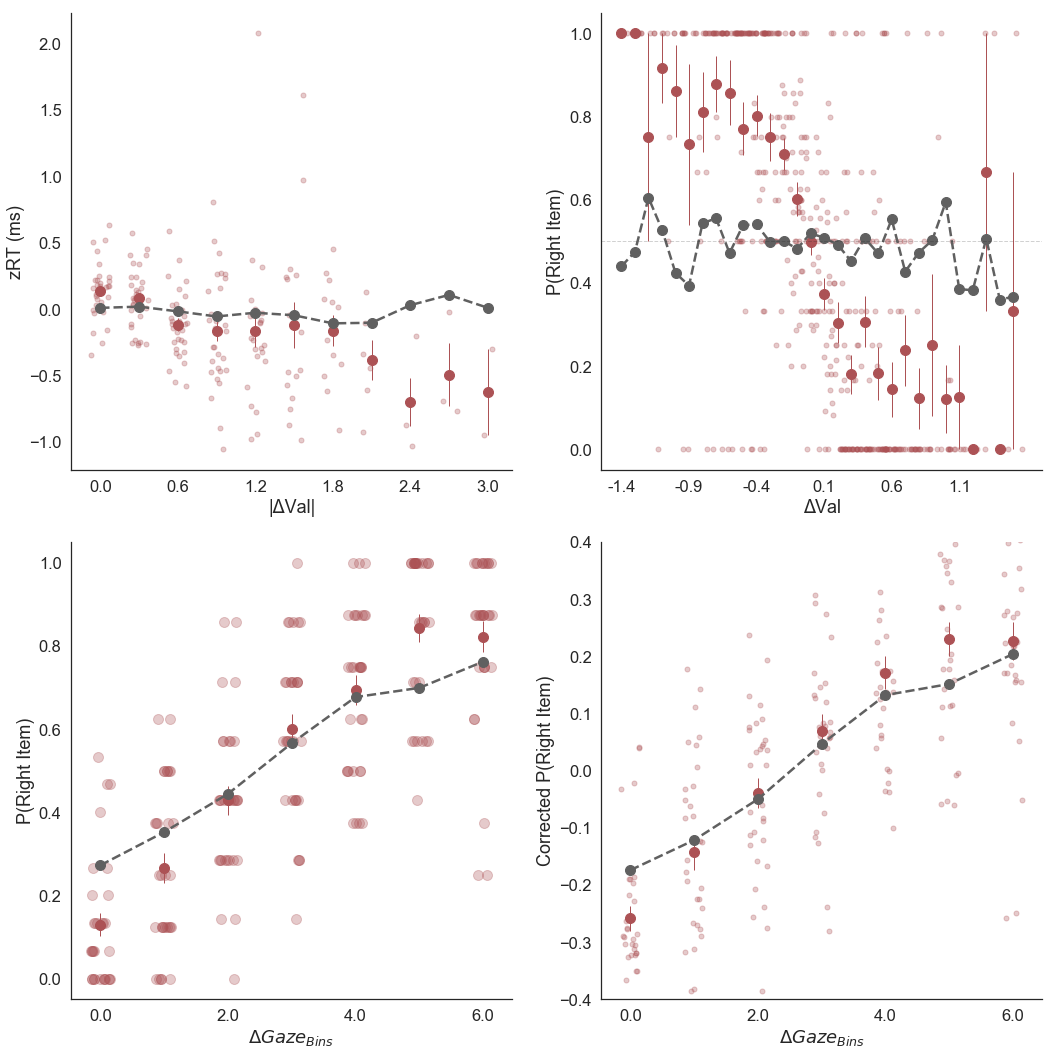

In [19]:
print('Close Figure to continue...')
glam.plot_fit(test_data, [glam_full.prediction], color_data = '#AC5255');
#glam.plot_fit(test_data, [glam_full.prediction,glam_nobias.prediction], color_data = '#AC5255' );
plt.show()
# Shown dots containing the mean observed for that segment bin for those participants

---------------------------------------------------------
# Case No-Bin DisLike Inverted NUTS 31

In [4]:
# Load data
sufix = '_individual_Dislike_Inv_NoBin_Gamma-11_NUTS_31'
data = pd.read_csv('data/FF2018_data/GlamDataFF2018_Dislike_NoBin_Inv_31.csv')
# Subset only necessary columns
data = data[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]
data.head()

,subject,trial,choice,rt,item_value_0,item_value_1,gaze_0,gaze_1
0,0,0,1,3327,2.05,1.00,0.745415,0.254585
1,0,1,1,3424,0.70,1.30,0.410720,0.589280
2,0,2,1,3691,1.30,1.75,0.330549,0.669451
3,0,3,0,8144,1.45,0.70,0.592345,0.407655
4,0,4,0,6559,1.00,1.00,0.641717,0.358283


## Split data in training and test sets

In [5]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for subject in data.subject.unique():
    subject_data = data[data['subject'] == subject].copy().reset_index(drop=True)
    n_trials = len(subject_data)
    
    subject_train = subject_data.iloc[np.arange(0, n_trials, 2)].copy()
    subject_test = subject_data.iloc[np.arange(1, n_trials, 2)].copy()

    test_data = pd.concat([test_data, subject_test])
    train_data = pd.concat([train_data, subject_train])

#test_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_test'+sufix+'.csv'))
#train_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_train'+sufix+'.csv'))

print('Split data into training ({} trials) and test ({} trials) sets...'.format(len(train_data), len(test_data)))

Split data into training (1860 trials) and test (1860 trials) sets...


# Load predictions

## Full Model

In [6]:
glam_full = glam.GLAM(train_data)

In [14]:
# Predictions
print('Predicting test set data using full GLAM...')
glam_full.exchange_data(test_data)

if not os.path.exists(str('results/predictions/glam_FF2019_full'+sufix+'.csv')):
    glam_full.predict(n_repeats=50)
    glam_full.prediction.to_csv(str('results/predictions/glam_FF2019_full'+sufix+'.csv'), index=False)
else:
    print('  Found old hierarchical full GLAM predictions in "results/predictions". Skipping prediction...')
    glam_full.prediction = pd.read_csv(str('results/predictions/glam_FF2019_full'+sufix+'.csv'))

glam_full.prediction.head()

Predicting test set data using full GLAM...
Replaced attached data (1860 trials) with new data (1860 trials)...
  Found old hierarchical full GLAM predictions in "results/predictions". Skipping prediction...


,subject,trial,repeat,choice,rt,item_value_0,gaze_0,item_value_1,gaze_1
0,0.0,0.0,0.0,1.0,3005.0,0.7,0.41072,1.3,0.58928
1,0.0,0.0,1.0,1.0,2821.0,0.7,0.41072,1.3,0.58928
2,0.0,0.0,2.0,1.0,2761.0,0.7,0.41072,1.3,0.58928
3,0.0,0.0,3.0,1.0,3449.0,0.7,0.41072,1.3,0.58928
4,0.0,0.0,4.0,1.0,2839.0,0.7,0.41072,1.3,0.58928


## No-bias

In [24]:
glam_nobias = glam.GLAM(train_data)

In [25]:
# Predictions
print('Predicting test set data using no-bias GLAM...')
glam_nobias.exchange_data(test_data)
 
if not os.path.exists(str('results/predictions/glam_FF2018_nobias_hierarchical_cv'+sufix+'.csv')):
     glam_nobias.predict(n_repeats=50)
     glam_nobias.prediction.to_csv(str('results/predictions/glam_FF2018_nobias_hierarchical_cv'+sufix+'.csv'), index=False)
else:
     print('  Found old hierarchical no-bias GLAM predictions in "results/predictions". Skipping prediction...')
     glam_nobias.prediction = pd.read_csv(str('results/predictions/glam_FF2018_nobias_hierarchical_cv'+sufix+'.csv'))
glam_nobias.prediction.head()

Predicting test set data using no-bias GLAM...
Replaced attached data (1860 trials) with new data (1860 trials)...
  Found old hierarchical no-bias GLAM predictions in "results/predictions". Skipping prediction...


,choice,repeat,rt,subject,trial,item_value_0,gaze_0,item_value_1,gaze_1
0,1.0,0.0,1543.0,0.0,0.0,0.7,0.41072,1.3,0.58928
1,1.0,1.0,2513.0,0.0,0.0,0.7,0.41072,1.3,0.58928
2,1.0,2.0,3018.0,0.0,0.0,0.7,0.41072,1.3,0.58928
3,1.0,3.0,1985.0,0.0,0.0,0.7,0.41072,1.3,0.58928
4,1.0,4.0,3134.0,0.0,0.0,0.7,0.41072,1.3,0.58928


Close Figure to continue...


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'
  seen=seen, canon=canonical, used=seen[-1]))


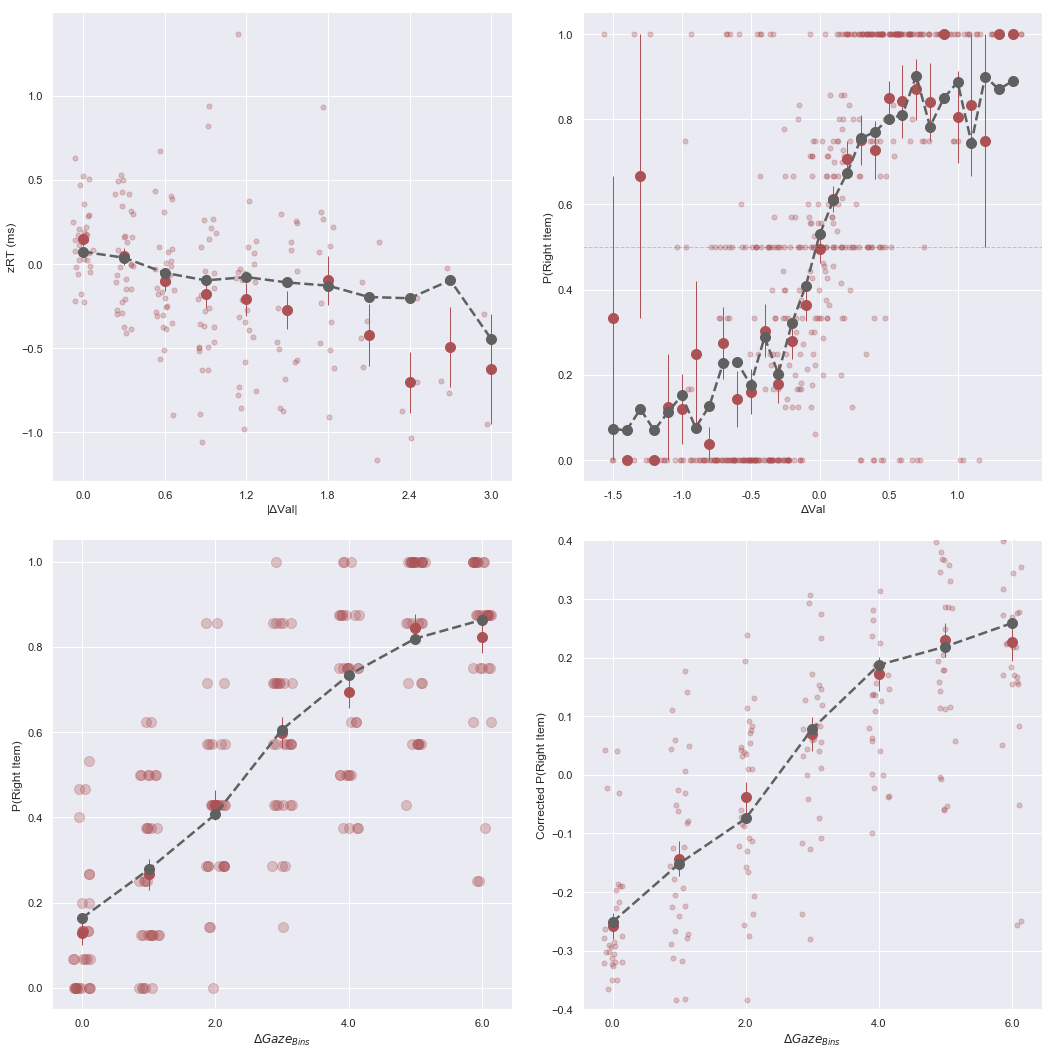

In [15]:
print('Close Figure to continue...')
glam.plot_fit(test_data, [glam_full.prediction], color_data = '#AC5255');
#glam.plot_fit(test_data, [glam_full.prediction,glam_nobias.prediction], color_data = '#AC5255' );
plt.show()
# Shown dots containing the mean observed for that segment bin for those participants

## REMEMBER THIS CASE IS NEGATIVE DELTA VALUE BECAUSE IT IS THE INVERTED CASE